<a href="https://colab.research.google.com/github/AndriuGJ/pro/blob/main/pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

!pip install pillow tensorflow --quiet


In [4]:
!wget -q https://huggingface.co/muhalwan/catndog/resolve/main/catdog_best.keras -O catdog_best.keras


In [5]:
import tensorflow as tf

# Cargar el modelo preentrenado
model = tf.keras.models.load_model("catdog_best.keras")


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adamw', because it has 5 variables whereas the saved optimizer has 9 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [63]:
from PIL import Image
import numpy as np

def predict_image_class(image_path):
    # Cargar y procesar imagen
    img = Image.open(image_path).resize((240, 240)).convert("RGB")
    img_array = np.expand_dims(np.array(img), axis=0)
    img_preprocessed = tf.keras.applications.efficientnet.preprocess_input(img_array)

    # Realizar predicción
    score = model.predict(img_preprocessed)[0][0]
    label = "Perro 🐶" if score >= 0.5 else "Gato 🐱"
    confidence = score if score >= 0.5 else 1 - score
    return label, confidence


In [64]:
from google.colab import files
uploaded = files.upload()


Saving meme.jpg to meme (1).jpg


In [69]:
for filename in uploaded.keys():
    label, confidence = predict_image_class(filename)
    print(f"{filename} → {label} ({confidence*100:.2f}%)")


error: OpenCV(4.12.0) /io/opencv/modules/imgproc/src/resize.cpp:3845: error: (-215:Assertion failed) !dsize.empty() in function 'resize'


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128054 (\N{DOG FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


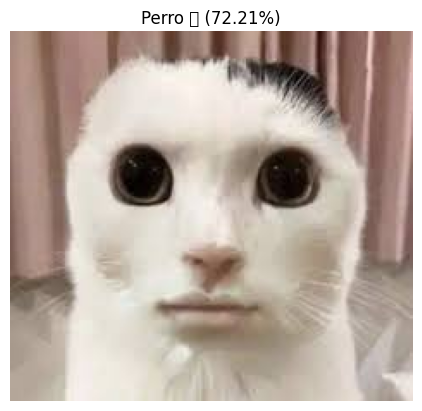

In [70]:
import matplotlib.pyplot as plt

img = Image.open(filename)
plt.imshow(img)
plt.axis("off")
plt.title(f"{label} ({confidence*100:.2f}%)")
plt.show()


Contar gatos y perros con YOLOv8

In [20]:
!pip install ultralytics --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.0 MB/s eta 0:00:00


In [21]:
from ultralytics import YOLO

# Cargar modelo YOLOv8n preentrenado en COCO (80 clases, incluye perro y gato)
model = YOLO("yolov8n.pt")  # También puedes usar yolov8m.pt o yolov8x.pt para más precisión


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


Saving gp.jpg to gp.jpg



image 1/1 /content/gp.jpg: 416x640 1 cat, 1 dog, 236.9ms
Speed: 4.3ms preprocess, 236.9ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 640)


Saving perros.jpg to perros (1).jpg

image 1/1 /content/perros (1).jpg: 640x640 2 persons, 9 dogs, 3 teddy bears, 336.7ms
Speed: 6.2ms preprocess, 336.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
🐱 Gatos detectados: 0
🐶 Perros detectados: 9


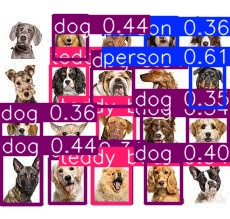

In [73]:
from ultralytics import YOLO
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt

# 1. Carga el modelo YOLOv8 preentrenado en COCO
model = YOLO("yolov8n.pt")

# 2. Sube una imagen
uploaded = files.upload()
img_path = next(iter(uploaded.keys()))

# 3. Ejecuta detección en la imagen
results = model(img_path)

# 4. Contar cuántos gatos y perros hay
class_ids = results[0].boxes.cls.cpu().numpy().astype(int)
cat_count = int((class_ids == 15).sum())
dog_count = int((class_ids == 16).sum())

print(f"🐱 Gatos detectados: {cat_count}")
print(f"🐶 Perros detectados: {dog_count}")

# 5. Mostrar la imagen con bounding boxes
results[0].save(filename="result.jpg")
display(Image.open("result.jpg"))


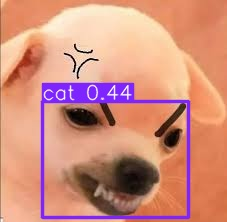

In [62]:
from IPython.display import Image, display

# Guardar y mostrar resultado con bounding boxes
results[0].save(filename="result.jpg")
display(Image("result.jpg"))


📤 Sube una imagen con gatos y/o perros:


Saving p3.jpg to p3 (2).jpg

image 1/1 /content/p3 (2).jpg: 384x640 3 dogs, 133.8ms
Speed: 3.4ms preprocess, 133.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)
🐱 Gatos detectados: 0
🐶 Perros detectados: 3


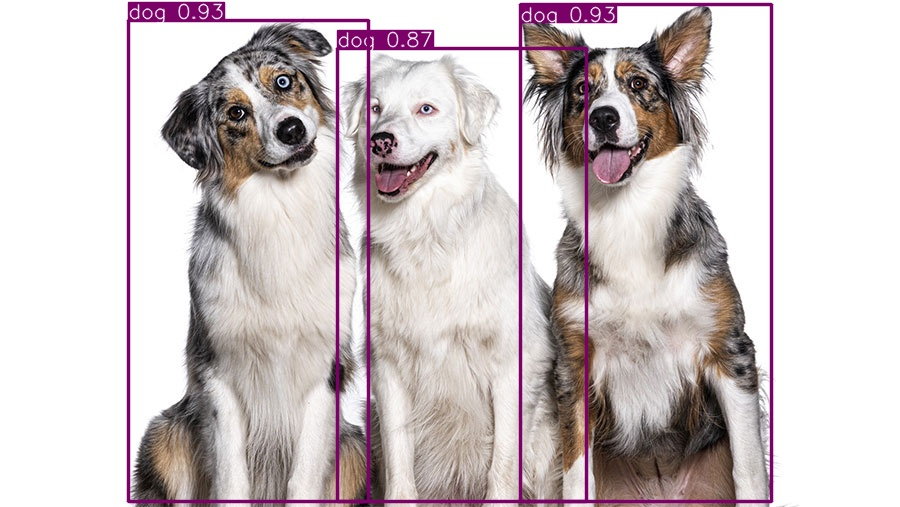

In [76]:
# 1. Instalar Ultralytics YOLO (si no está instalado)
!pip install ultralytics

# 2. Importar librerías
from ultralytics import YOLO
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt

# 3. Cargar el modelo preentrenado (YOLOv8n - pequeño pero efectivo)
model = YOLO("yolov8n.pt")  # También puedes usar yolov8s.pt o yolov8m.pt para más precisión

# 4. Subir una imagen desde tu dispositivo
print("📤 Sube una imagen con gatos y/o perros:")
uploaded = files.upload()
img_path = next(iter(uploaded.keys()))

# 5. Ejecutar detección
results = model(img_path)

# 6. Contar cuántos gatos y perros hay
class_ids = results[0].boxes.cls.cpu().numpy().astype(int)
cat_count = int((class_ids == 15).sum())  # ID 15 = cat
dog_count = int((class_ids == 16).sum())  # ID 16 = dog

print(f"🐱 Gatos detectados: {cat_count}")
print(f"🐶 Perros detectados: {dog_count}")

# 7. Mostrar la imagen con bounding boxes
results[0].save(filename="result.jpg")
display(Image.open("result.jpg"))


📤 Sube una imagen con gatos y/o perros:


Saving g10.jpg to g10 (1).jpg

image 1/1 /content/g10 (1).jpg: 128x640 3 cats, 9 dogs, 50.3ms
Speed: 1.3ms preprocess, 50.3ms inference, 1.0ms postprocess per image at shape (1, 3, 128, 640)
🐱 Gatos detectados: 3
🐶 Perros detectados: 9


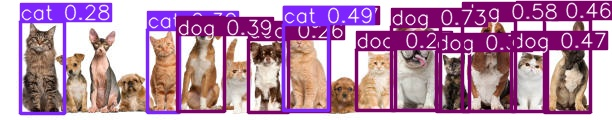

In [79]:
# 2. Importar librerías
from ultralytics import YOLO
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt

# 3. Cargar el modelo preentrenado (YOLOv8n - pequeño pero efectivo)
model = YOLO("yolov8n.pt")  # También puedes usar yolov8s.pt o yolov8m.pt para más precisión

# 4. Subir una imagen desde tu dispositivo
print("📤 Sube una imagen con gatos y/o perros:")
uploaded = files.upload()
img_path = next(iter(uploaded.keys()))

# 5. Ejecutar detección
results = model(img_path)

# 6. Contar cuántos gatos y perros hay
class_ids = results[0].boxes.cls.cpu().numpy().astype(int)
cat_count = int((class_ids == 15).sum())  # ID 15 = cat
dog_count = int((class_ids == 16).sum())  # ID 16 = dog

print(f"🐱 Gatos detectados: {cat_count}")
print(f"🐶 Perros detectados: {dog_count}")

# 7. Mostrar la imagen con bounding boxes
results[0].save(filename="result.jpg")
display(Image.open("result.jpg"))